# Discrete and Continuous Random Variables


A random variable is a variable that takes a value according to chance. Probability distribution is the probability that each value can come out of the random variable.

Random variables can be divided in two different classes:
- Discrete random variable
- Continuous random variable

We can easily see how modeling random variables can come in handy when dealing with finance. Financial assets are often expressed as moving according to deterministic and random patterns. Each random variable follows a probability distribution, a function which describes it. The probability distribution assigns probabilities to all possible values of a random variable. For a given random variable `X`, we express the probability that `X` is equal to a value `x` as `P(X = x)`. For discrete random variables, we can express `p(x) = P(X = x)` in shorthand -> this is known as the `probability mass function` (PMF). For continuous random variables we cannot use a PMF so we must use a `probability density function` (PDF).

Probability distributions form the basis for the Black-Scholes and binomial pricing models as well as the CAPM.

For each probability distribution funcion, we also have a `cumulative distribution function` (CDF). This is defined as `P(X <= x)`.

In [83]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools

sns.set_theme()

## Discrete Random Variables

A discrete random variable is one with a countable number of outcomes. Each of them has a separate probability associated with it. Consider a coin flip or a die roll: for the coin flip there are two possible outcomes, either heads or tails, each with a `1/2` probability of occurring. Discrete random variables do not always have equal weights for all outcomes. The basic unit of a discrete random variable is its `probability mass function` (PMF), another name for the probability function `p(x)`. The PMF gives a probability to each point in the domain of the probability distribution. A probability function has two main properties:
- $0 \leq p(x) \leq 1$ -> all probabilities are in the interval `[0, 1]`.
- The sum of all probabilities `p(x)` over all values of X is equal to `1`. The total weights for all values of the random variable must add to `1`.

In [3]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples

### Uniform Distribution
The basic type of probability distribution is the uniform distribution. With a discrete uniform distribution, equal weight is assigned to all outcomes. The rolling die has six faces, numbered `1` through `6`, each equally likely to occur with a `1/6` chance each. With this, we know that the PMF must be `p(x) = 1/6` for all values of our uniform random variable `X`.

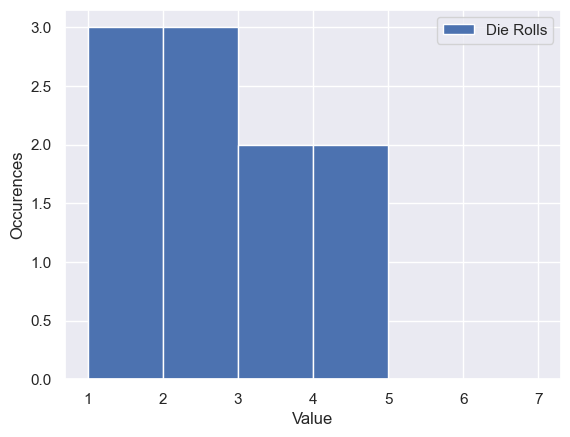

In [4]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.hist(DieRolls.draw(10), bins=[1,2,3,4,5,6,7], align='mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

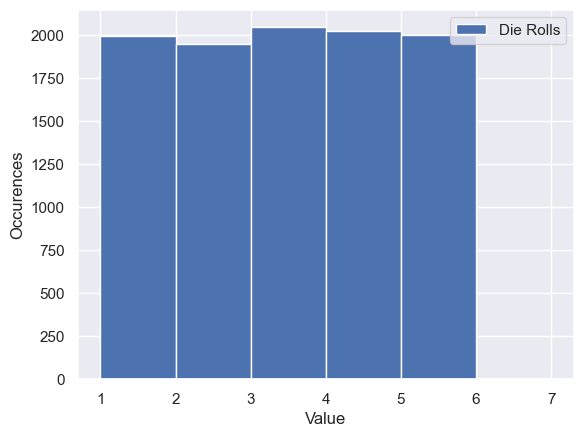

In [5]:
plt.hist(DieRolls.draw(10000), bins=[1,2,3,4,5,6,7], align='mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

Let's look at the possibilities for all values of both the probability function and the cumulative distribution function:
Value: $X = x$ | PMF: $p(x) = P(X = x)$ | CDF: $F(x) = P(X \leq x)$ | --- | --- | --- | 1 | $1/6$ | $1/6$ 2 | $1/6$ | $1/3$ 3 | $1/6$ | $1/2$ 4 | $1/6$ | $2/3$ 5 | $1/6$ | $5/6$ 6 | $1/6$ | $1$

The probability function satisfies the necessary conditions. 

### Binomial Distribution

A binomial distribution is used to describe successes and failures. This can be very useful in an investment context as many of our choices tend to be binary like this. When we take a single success/failure trial, we call it a Bernoulli trial. With the Bernoulli random variable, we have two possible outcomes:

$p(1) = P(Y = 1) = p$

$p(0) = P(Y = 0) = 1 - p$

We consider `Y` taking a value of `1` to be success, so the probability of a success occurring in a single trial is `p`.

A binomial distribution takes a set of `n` Bernoulli trials. As such, we can have somewhere between `0` and `n` successes. Each trial has the same probability of success `p`, and is independent from the others. A binomial random variable is defined as `X ~ B(n,p)` -> X is a binomial random variable with `n` trials and `p` probability of success.

If we have `6` pairs of socks and we want to choose `2` of them, we would write the total number of combinations possible as $\binom{6}{2}$.

$\binom{6}{2} = \frac{6!}{2! (6-2)!} = \frac{6!}{2! 4!} = 15$

More generally: $\binom{n}{x} = \frac{n!}{(n-x)! \ x!}$


Now, we use this notation to choose successes with the binomial random variable. The combination serves the purpose of computing how many different ways we can reach the same result. The probability functions is therefore: $p(x) = P(X = x) = \binom{n}{x}p^x(1-p)^{n-x} = \frac{n!}{(n-x)! \ x!} p^x(1-p)^{n-x}$

In [6]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    
    def draw(self, numberOfSamples):
        sample = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return sample

Stock price example: let's say the price will move up or down, each with a probability $p = 0.5$. Let's consider a move up `U` a success, while a move down `D` a failure. We can analyze the probability of each event using a binomial random variable. With $n=5$, we consider 5 observations. 

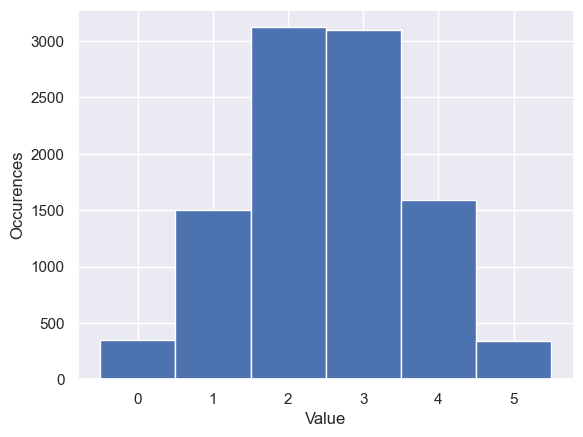

In [7]:
StockProbabilities = BinomialRandomVariable(5, 0.5)
plt.hist(StockProbabilities.draw(10000), bins=[0,1,2,3,4,5,6], align='left')
plt.xlabel('Value')
plt.ylabel('Occurences');

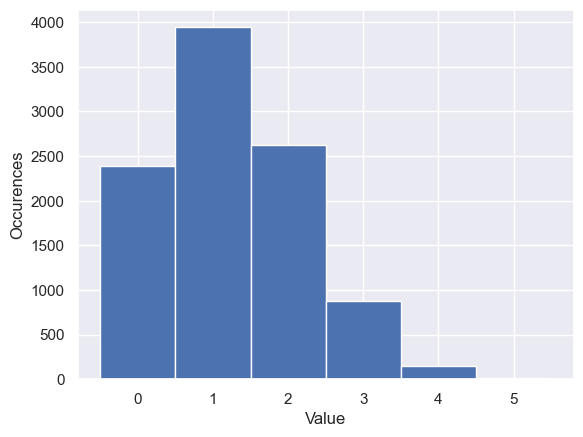

In [8]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins=[0,1,2,3,4,5,6], align='left')
plt.xlabel('Value')
plt.ylabel('Occurences');

Changing the value of $p$ from $0.50$ to $0.25$ makes the distribution asymmetric. We can extend this idea of stock price moving with a binomial random variable into a framework called Binomial Model of Stock Price Movement, used as a foundation for option pricing.

## Continuous Random Variables

Continuous random variables differ from discrete random variables in that continuous ones can take infinitely many outcomes. They cannot be counted or described as a list.

We can resolve this issue by taking probabilities across ranges of outcomes. With a continuous random variable $P(X = 0)$ is meaningless. Instead, we would look for something more like $P(-1 < X < 1)$. For continuous random variables we define a probability density function (PDF), $f_X(x)$ such that we can say:

$P(a < X < b) = \int_a^b f_X(x)dx$

1. $f_X(x) \ge 0$ for all values of $X$
2. $P(-\infty < X < \infty) = \int_{-\infty}^{\infty}{f_X(x)dx} = 1$

The probabilities at the endpoints of a range are $0$. Hence, $P(a \le X \le b) = P(a < X \le b) = P(a \le X < b) = P(a < X < b)$. If we integrate the PDF across all possibilities the value should be 1.

In [9]:
class ContinuousRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

### Uniform Distribution

The uniform distribution can also be defined within the framework of a continuous random variable. We take $a$ and $b$ to be constant, where $b$ is the highest possible value and $a$ is the lowest one. The PDF of a uniform random variable is: 

$f(x) = \begin{cases}\frac{1}{b - a} & \text{for a < x < b} \\ 0 & \text{otherwise}\end{cases}$

Text(0, 0.5, 'Probability')

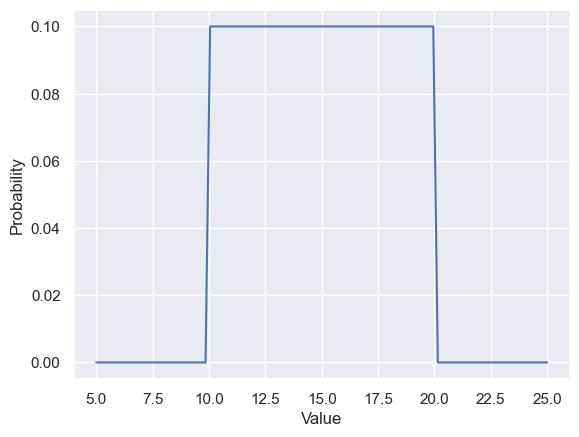

In [10]:
a = 10.0
b = 20.0
x = np.linspace(5, 25, 100)
y = [1/(b-a) if (a < i < b) else 0 for i in x]
plt.plot(x, y)
plt.xlabel("Value")
plt.ylabel("Probability")

The continuous uniform distribution PDF is constant for all values the variable can take on. The CDF is:

$F(x) = \begin{cases} 0 & \text{for } x \le a \\ \frac{x - a}{b - a} & \text{for a < x < b} \\ 1 & \text{for } x \ge b \end{cases}$

Text(0, 0.5, 'Probability')

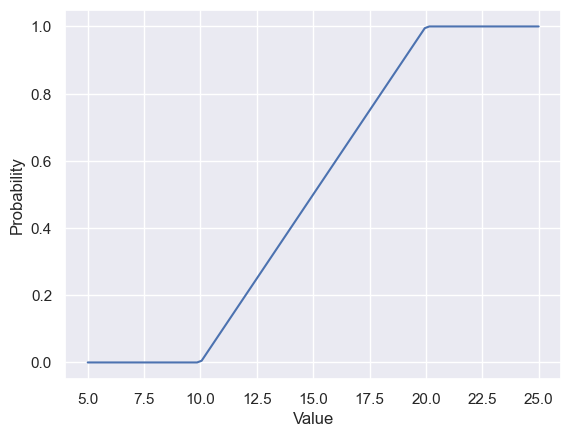

In [11]:
y = [(i-a)/(b-a) if (a < i < b) else 0 if i <= a else 1 for i in x]
plt.plot(x, y)
plt.xlabel("Value")
plt.ylabel("Probability")

### Normal Distribution

The normal distribution is very important due to the results of the Central Limit Theorem (CLT), which states that large enough samples of independent trials are normally distributed.

In [12]:
class NormalRandomVariable:
    def __init__(self, mean = 0, variance = 1):
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        return
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

When we describe a normal random variable we only need to know its mean ($\mu$) and variance ($\sigma^2$, where $\sigma$ is the standard deviation). We denote a random variable $X$ as a normal one by saying $X $~$ N(\mu, \sigma^2)$.

A multivariate normal distribution is described entirely by the means of each variable, their variances, and the distinct correlations between each and every pair of variables. This is important because the variance of the overall portfolio depends on the variances of its securities and the correlations between them.

The PDF of a normal random variable is: $f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

Defined for $-\infty < x < \infty$.

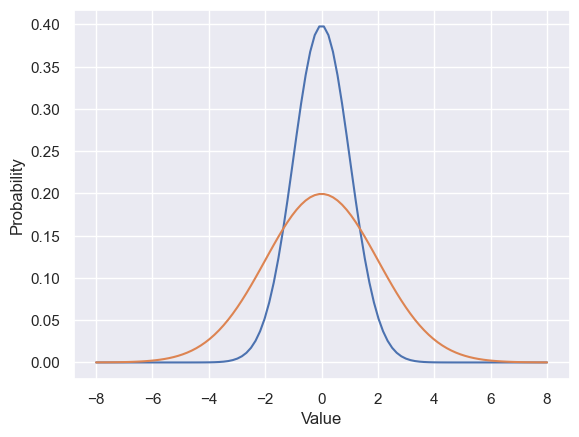

In [36]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 100)
y = 1/(sigma_1 * np.sqrt(2 * np.pi)) * np.exp(- (x - mu_1)**2 / (2 * sigma_1**2))
z = 1/(sigma_2 * np.sqrt(2 * np.pi)) * np.exp(- (x - mu_2)**2 / (2 * sigma_2**2))
plt.plot(x, y, x, z)
plt.xlabel('Value')
plt.ylabel('Probability');

By changing the mean and standard deviation of the normal distribution, we can change the depth and width of the bell curve. With a larger standard deviation, the values of the distribution are less concentrated around the mean.

We use the normal distribution to model stock returns, instead of prices.

Given the mean and variance of a normal distribution, we can make the following statements:
- Around $68\%$ of all observations fall within one standard deviations around the mean ($\mu\pm\sigma$)
- Around $95\%$ of all observations fall within two standard deviations around the mean ($\mu\pm2\sigma$)
- Around $99\%$ of all observations fall within three standard deviations aroud the mean ($\mu\pm3\sigma$)

Using the CLT, we can standardize different random variables so that they become normal random variables. We standardize a random variable $X$ by substracting the mean and dividing by the variance, resulting in the standard normal random variable $Z$.

$Z = \frac{X - \mu}{\sigma}$

$X $~$ B(n, p)$ is a binomial random variable. In this case, the mean is $\mu = np$ and the variance $\sigma^2 = np(1-p)$.

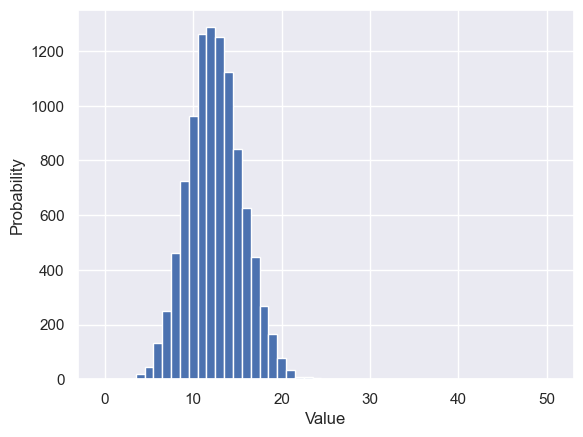

In [44]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p) / (np.sqrt(n * p * (1 - p)))

plt.hist(X_samples, bins = range(0, n + 2), align = 'left')
plt.xlabel('Value')
plt.ylabel('Probability');

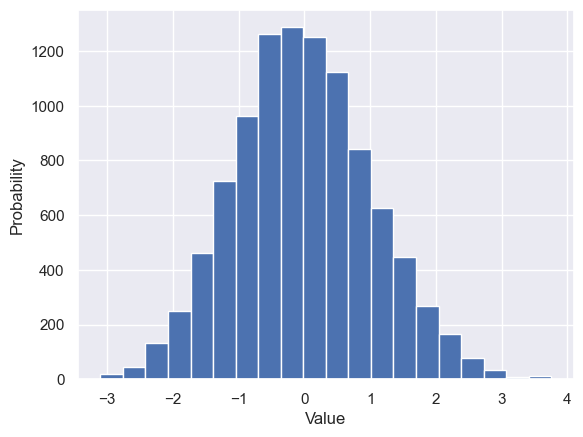

In [45]:
plt.hist(Z_samples, bins = 20)
plt.xlabel('Value')
plt.ylabel('Probability');

Let's assume that stock returns are normally distributed. Say that $Y$ is the price of a stock. We will simulate its returns and plot it.

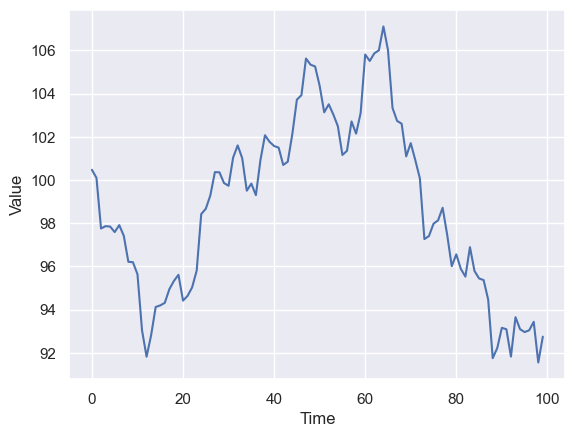

In [62]:
Y_initial = 100
X = NormalRandomVariable(0, 1)
Y_returns = X.draw(100) # Generate 100 daily returns
Y = pd.Series(np.cumsum(Y_returns), name = 'Y') + Y_initial
Y.plot()
plt.xlabel('Time')
plt.ylabel('Value');

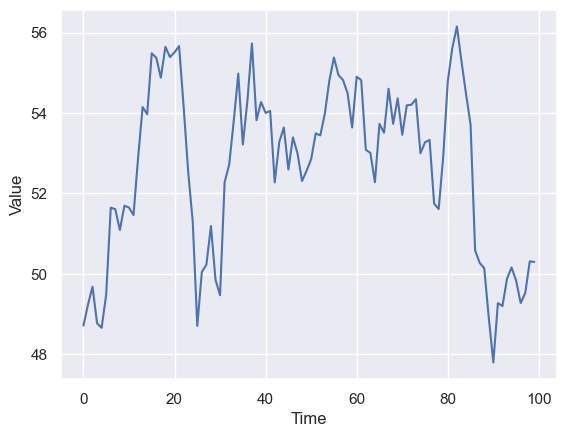

In [63]:
Z_initial = 50
Z_returns = X.draw(100) # Generate 100 daily returns
Z = pd.Series(np.cumsum(Z_returns), name = 'Z') + Z_initial
Z.plot()
plt.xlabel('Time')
plt.ylabel('Value');

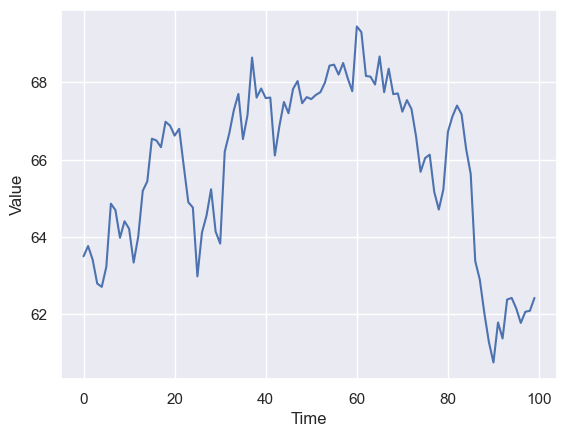

In [75]:
# Let's construct a portfolio W by taking weighted average of Y and Z based on their quantity.
Y_quantity = 20
Z_quantity = 50
Y_weight = Y_quantity / (Y_quantity + Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = 'Portfolio') + W_initial
W.plot()
plt.xlabel('Time')
plt.ylabel('Value');

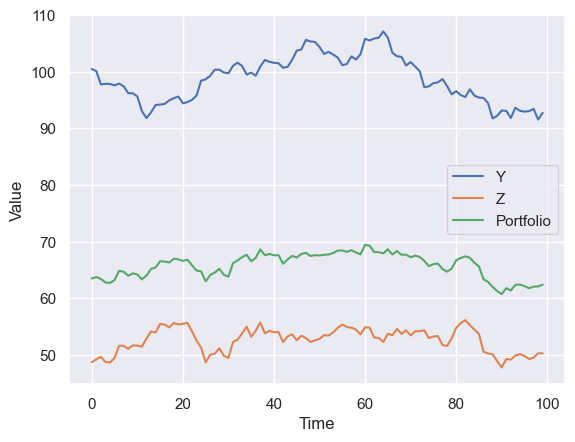

In [78]:
pd.concat([Y, Z, W], axis = 1).plot()
plt.xlabel('Time')
plt.ylabel('Value');

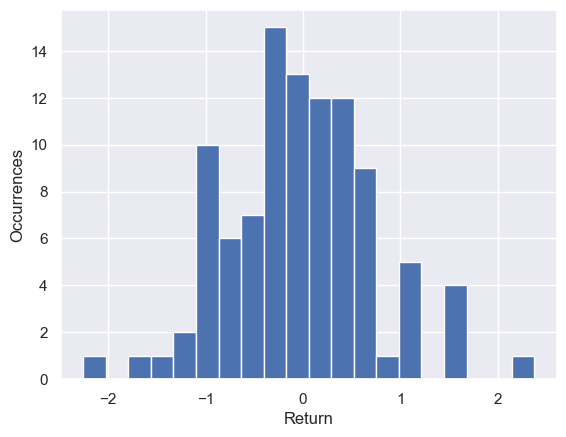

In [82]:
plt.hist(W_returns, bins=20);
plt.xlabel('Return')
plt.ylabel('Occurrences');

## Fitting a Distribution

We now try to fit a normal distribution to Tesla's stock returns. To do that, we will use the Jarque-Bera test, which indicates non-normality if the p-value is below a cutoff.

In [87]:
start = "2015-01-01"
end = "2016-01-01"
prices = yf.download("TSLA", start, end)[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


The JB test p-value is: 2.85516053567805e-12
We reject the hypothesis that the data are normally distributed: True
The skewness of the returns is: 0.20475398072271372
The kurtosis of the returns is: 5.217136246260784


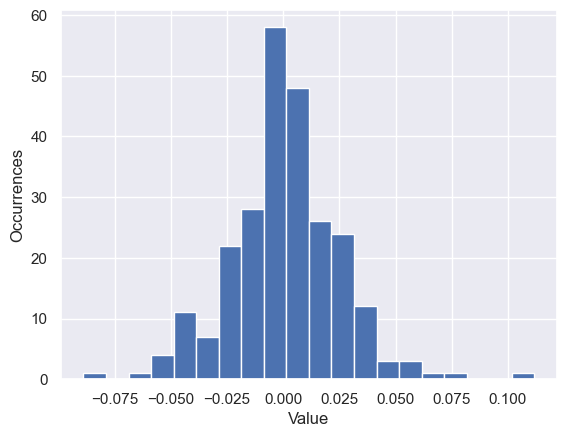

In [110]:
# Compute daily returns
returns = prices.pct_change()[1:]

# Set a cutoff
cutoff = 0.01

# Get the p-value of the JB test
_, p_value, skewness, kurtosis = stattools.jarque_bera(returns)
print("The JB test p-value is:", p_value[0])
print("We reject the hypothesis that the data are normally distributed:", p_value[0] < cutoff)
print("The skewness of the returns is:", skewness[0])
print("The kurtosis of the returns is:", kurtosis[0])

plt.hist(returns['Adj Close'], bins=20)
plt.xlabel('Value')
plt.ylabel('Occurrences');

The low p-value of the JB test leads us to reject the null hypothesis that the returns are normally distributed. This is due to the high kurtosis (normal distributions have a kurtosis of $3$).

We will proceed from here assuming that the returns are normally distributed so that we can go through the steps of fitting a distribution.

In [111]:
sample_mean = np.mean(returns['Adj Close'])
sample_std = np.std(returns['Adj Close'])

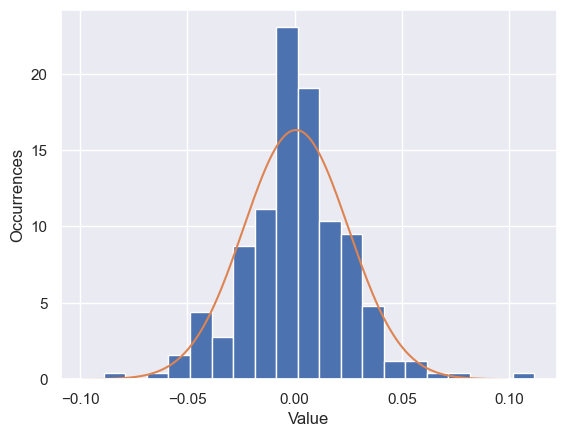

In [120]:
x = np.linspace(-(sample_mean + 4 * sample_std), (sample_mean + 4 * sample_std), len(returns))
sample_distribution = 1/(sample_std * np.sqrt(2 * np.pi)) * np.exp(- (x - sample_mean)**2 / (2 * sample_std**2))

plt.hist(returns['Adj Close'], bins = 20, density = True);
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');

The theoretical curve for the returns has a substantially lower peak than the actual values, which makes sense because the returns are not actually normally distributed. This is again due to the kurtosis of the normal distribution. The returns have a kurtosis value of around $5.2$, while the kurtosis of the normal distribution is $3$. A higher kurtosis leads to a higher peak. A lot of theories and frameworks in finance require that data be somehow related to the normal distribution. This is a major reason for why the normal distribution seems to be so prevalent.